# Homework 1: Frequency Modulated Continuous Wave (FMCW) Radar
#### GEOPH 597: CUAHSI Virtual University - Microwave Radar Remote Sensing

Steven Pestana, November 2019

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Signal processing functions:
from scipy.signal import decimate

## 1. Simulate an FMCW Signal

#### 1.1 Create time and frequency vectors, and plot:

Create time array:

In [2]:
dt = 5e-9 # delta t of 5 nanoseconds
pl = 1e-4 # pulse length in seconds
n = np.int(pl/dt) # number of time steps (must be an integer)
t = np.linspace(0,pl,n) # create linear time array

Create frequency array:

In [3]:
fl = 200e3 # low frequency, 200 KHz
fh = 1600e3 # high frequency, 1600 KHz
bw = fh - fl # bandwidth
f = fl + (bw/pl)*t # create linear frequency array as a function of time

v = 2.998e8 # velocity, speed of light

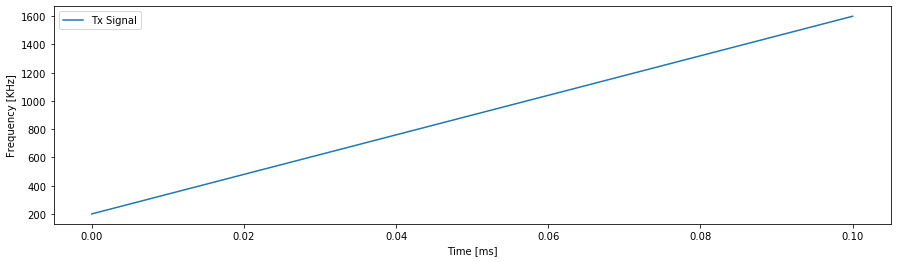

In [4]:
plt.figure(figsize=(15,4))
plt.plot(t/1e-3,f/1e3,label='Tx Signal') # convert to KHz and ms for ease of reading and plot
plt.ylabel('Frequency [KHz]')
plt.xlabel('Time [ms]')
plt.legend(loc='best');

#### 1.2 Create Voltage vector and plot:

In [5]:
Eo = 2 # amplitude of 2 volts
z = 0 # assume a distance from the antenna

# Define a function to calculate voltage versus time given z, t, f, and v
def E(z,t,f,v,Eo):
    l = v/f                    # lambda, wavelength, from speed of light and frequency
    a = ((2*np.pi)/l)*z        # part of equation below
    b = (2*np.pi*f*t)          # part of equation below
    i = 0+1j                   # sqrt(-1)
    Ezt = Eo * np.exp(i*(a-b)) # calculate the voltage at each time step for the duration of the Tx chirp
    return Ezt

Ezt = E(z,t,f,v,Eo)

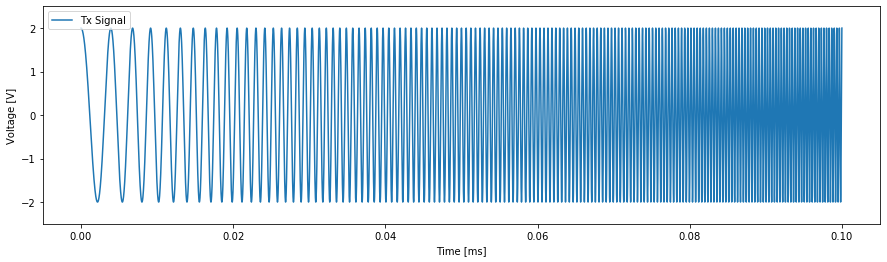

In [6]:
plt.figure(figsize=(15,4))
plt.plot(t/1e-3,Ezt.real,label='Tx Signal')
plt.ylim((-2.5,2.5))
plt.ylabel('Voltage [V]')
plt.xlabel('Time [ms]')
plt.legend(loc='best');

#### 1.3 Calculate reflection from first target, plot frequency versus time:

In [7]:
d_1 = 1500    # distance to first target = 1500 m
twd_1 = d_1 * 2 # two-way distance
twt_1 = twd_1/v   # two-way travel time = two-way distance / speed of light
t_1 = t+twt_1   # t - twt time array for first target
f_1 = fl + (bw/pl)*t # reflected frequency as a function of time for first target
print('Two-way travel time to {} m target: {} ms'.format(d_1,np.round(twt_1/1e-3,3)))

Two-way travel time to 1500 m target: 0.01 ms


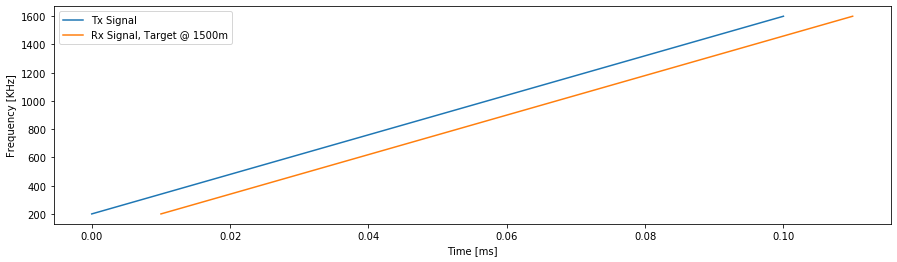

In [8]:
plt.figure(figsize=(15,4))
plt.plot(t/1e-3,f/1e3,label='Tx Signal') # convert to KHz and ms for ease of reading and plot
plt.plot(t_1/1e-3,f_1/1e3,label='Rx Signal, Target @ 1500m')
plt.ylabel('Frequency [KHz]')
plt.xlabel('Time [ms]')
plt.legend(loc='best');

#### 1.4 Calculate and plot recieved wave voltage versus time:

In [9]:
Eo_1 = 0.5 # attenuated 0.5 V signal recieved at the antenna
Ezt_1 = E(z,t,f_1,v,Eo_1) # reflected voltage as a function of time

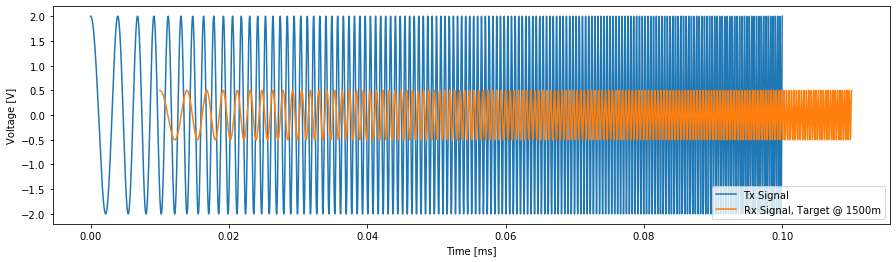

In [10]:
plt.figure(figsize=(15,4))
plt.plot(t/1e-3,Ezt.real,label='Tx Signal')
plt.plot(t_1/1e-3,Ezt_1.real,label='Rx Signal, Target @ 1500m')
plt.ylabel('Voltage [V]')
plt.xlabel('Time [ms]')
plt.legend(loc='best')

#### Calculate for a target at 1800 m distance:

In [11]:
d_2 = 1800    # distance to first target = 1500 m
twd_2 = d_2 * 2 # two-way distance
twt_2 = twd_2/v   # two-way travel time = two-way distance / speed of light
t_2 = t+twt_2   # t - twt time array for first target
f_2 = fl + (bw/pl)*t # reflected frequency as a function of time for first target
print('Two-way travel time to {} m target: {} ms'.format(d_2,np.round(twt_2/1e-3,3)))

Two-way travel time to 1800 m target: 0.012 ms


Plot frequency versus time for transmitted and the two recieved signals.

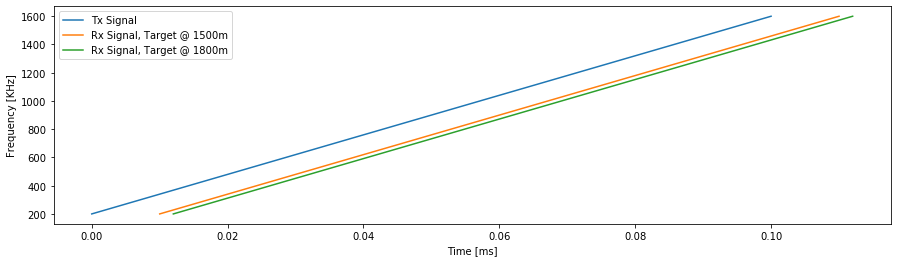

In [12]:
plt.figure(figsize=(15,4))
plt.plot(t/1e-3,f/1e3,label='Tx Signal') # convert to KHz and ms for ease of reading and plot
plt.plot(t_1/1e-3,f_1/1e3,label='Rx Signal, Target @ 1500m')
plt.plot(t_2/1e-3,f_2/1e3,label='Rx Signal, Target @ 1800m')
plt.ylabel('Frequency [KHz]')
plt.xlabel('Time [ms]')
plt.legend(loc='best');

In [13]:
Eo_2 = 0.1 # attenuated 0.1 V signal recieved at the antenna
Ezt_2 = E(z,t,f_2,v,Eo_2) # reflected voltage as a function of time

Pad all transmitted and recieved signals with zeros to put them all on the same timeline

In [14]:
# Pad reflected signal from target 1 with voltage=0
len_1 = int(np.ceil(twt_1/dt))
zeros_1 = np.zeros((len_1))
Rx_1 = np.append(zeros_1,Ezt_1)
len_3 = int(np.floor((twt_2-twt_1)/dt))
zeros_3 = np.zeros((len_3))
Rx_1 = np.append(Rx_1,zeros_3)

# Pad relfected signal from target 2 with voltage=0
len_2 = int(np.ceil(twt_2/dt))
zeros_2 = np.zeros((len_2))
Rx_2 = np.append(zeros_2,Ezt_2)

# Pad transmitted signal with voltage=0
Tx = np.append(Ezt,zeros_2)

# Create time array to capture all Tx and Rx signals
T = np.linspace(0,pl+twt_2,Tx.size) # create linear time array) # extend original t to lengt of Tx

Plot the Tx, Rx_1, and Rx_2 singnals, now all properly padded with 0s across the total time range.

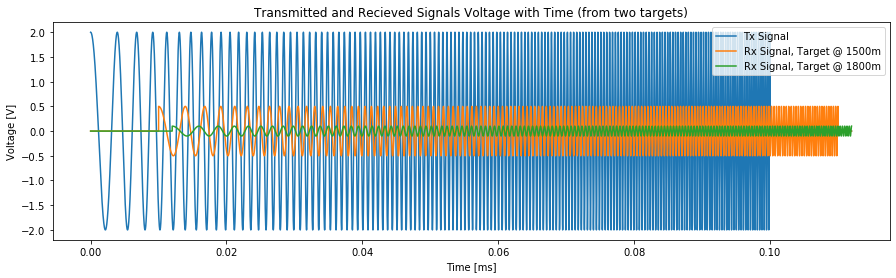

In [15]:
plt.figure(figsize=(15,4))
plt.plot(T/1e-3,Tx.real,label='Tx Signal')
plt.plot(T/1e-3,Rx_1.real,label='Rx Signal, Target @ 1500m')
plt.plot(T/1e-3,Rx_2.real,label='Rx Signal, Target @ 1800m')
plt.ylabel('Voltage [V]')
plt.xlabel('Time [ms]')
plt.title('Transmitted and Recieved Signals Voltage with Time (from two targets)')
plt.legend(loc='best');

Combine the Rx signals from targets 1 and 2 into a single Rx signal.

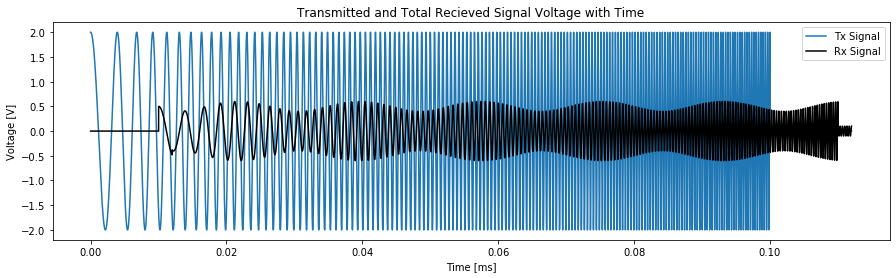

In [16]:
Rx = Rx_1 + Rx_2 # Total recieved signal is the sum of the two Rx from each target

plt.figure(figsize=(15,4))
plt.plot(T/1e-3,Tx.real,label='Tx Signal')
plt.plot(T/1e-3,Rx.real,'k',label='Rx Signal')
plt.ylabel('Voltage [V]')
plt.xlabel('Time [ms]')
plt.title('Transmitted and Total Recieved Signal Voltage with Time')
plt.legend(loc='best');

#### 1.7 FMCW Total Recieved Signal:

In [17]:
# Calculate the portion of Tx used by the FMCW mixer (scaled)
sa = 0.01 # sample amplitude scale (1/100th of Tx amplitude)
Ezt_0 = E(z,t,f,v,Eo*sa)
# Pad transmitted signal with voltage=0 for later time steps
Tx_0 = np.append(Ezt_0,zeros_2)

# Compute total mixed signal Rx
M = np.real(Tx_0) * np.real(Rx) # Mixed Rx signal

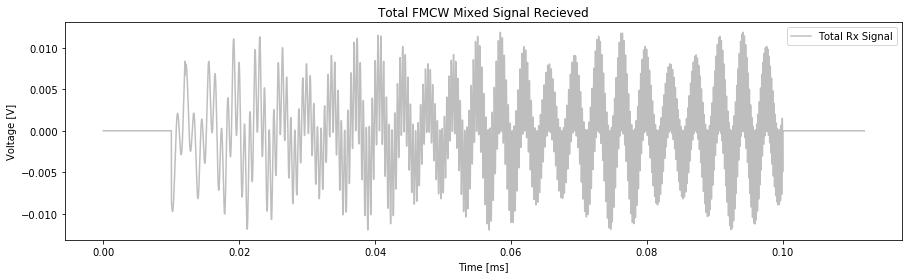

In [18]:
plt.figure(figsize=(15,4))
plt.plot(T/1e-3,M.real,c='tab:grey',alpha=0.5,label='Total Rx Signal')
plt.ylabel('Voltage [V]')
plt.xlabel('Time [ms]')
plt.title('Total FMCW Mixed Signal Recieved')
plt.legend(loc='best');

## 2. Record the FMCW Signal

#### 2.10 Use a low-pass filter, and resample at a rate 100 times slower than the true signal:
(Using [scipy.signal.decimate](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.decimate.html) function, documentation recommends performint decimation in multiple steps with IIR if factor > 13)

In [19]:
_s = decimate(M,10,ftype='iir') # I want to downsample by a factor of 100, so I do 10 first
s = decimate(_s,10,ftype='iir') # and then 10 a second time

t_s = np.linspace(0,T.max(),int(T.size/100)+1) # create new time array, sampled by 1/100
dt_s = t_s[1] - t_s[0] # new sampling timestep

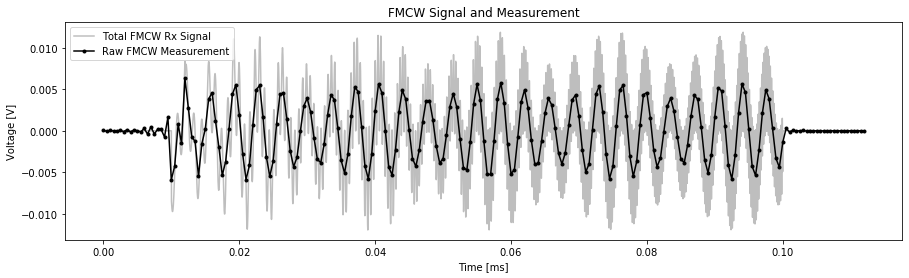

In [20]:
plt.figure(figsize=(15,4))
plt.plot(T/1e-3,M,c='tab:grey',alpha=0.5,label='Total FMCW Rx Signal')
plt.plot(t_s/1e-3,s,'.-k',label='Raw FMCW Measurement')
plt.ylabel('Voltage [V]')
plt.xlabel('Time [ms]')
plt.title('FMCW Signal and Measurement')
plt.legend(loc='best');

## 3. Processing the FMCW Signal:

#### 3.11 Use FFT to get the frequency spectrum of this signal:
(Using the [numpy.fft.fft](https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fft.html#numpy.fft.fft) and [numpy.fft.fftfreq](https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fftfreq.html#numpy.fft.fftfreq) functions)

In [21]:
n = 2**10 # number of sample points

# Compute FFT on s
sf_ = np.fft.fft(s,n)
sf = np.abs(sf_[:n//2]) # take absolute value, limit to positive freqs only

# Create freq array for s, in cycles per second (Hz)
freq_ = np.fft.fftfreq(sf_.size, dt_s)
freq = freq_[:n//2] # limit to positive freqs only

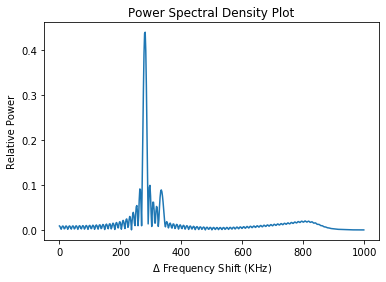

In [22]:
# Plot PSD:
plt.plot(freq/1e3,sf)
plt.title('Power Spectral Density Plot')
plt.ylabel('Relative Power')
plt.xlabel('$\Delta$ Frequency Shift (KHz)');

Convert delta frequency shift to distances:

In [23]:
twt = freq*(pl/bw) # calculate two way travel time from these frequencies
dist = (v * twt) / 2**2 # caluclate distance from the two way travel times

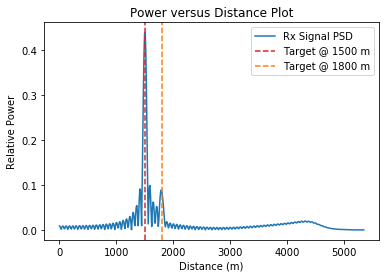

In [24]:
plt.plot(dist,sf.real,label='Rx Signal PSD')
plt.axvline(1500,c='tab:red',linestyle='--',label='Target @ 1500 m')
plt.axvline(1800,c='tab:orange',linestyle='--',label='Target @ 1800 m')

plt.title('Power versus Distance Plot')
plt.ylabel('Relative Power')
plt.legend()
plt.xlabel('Distance (m)');

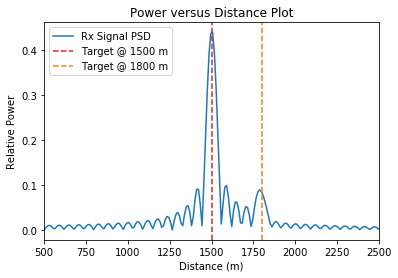

In [25]:
plt.plot(dist,sf.real,label='Rx Signal PSD')
plt.axvline(1500,c='tab:red',linestyle='--',label='Target @ 1500 m')
plt.axvline(1800,c='tab:orange',linestyle='--',label='Target @ 1800 m')

plt.xlim((500,2500))
plt.title('Power versus Distance Plot')
plt.ylabel('Relative Power')
plt.legend()
plt.xlabel('Distance (m)');